# Proyecto # 02: Ingeniería de features, Modelos avanzados e Interpretación de modelos

### (Acámica - DS online 40 - Proyecto 02 - Alexander Ortega)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
df = pd.read_csv('DS_Proyecto_02_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

### 1. Descartar variables que no son relevantes para el modelo

Inicialmente precindiremos de las columnas que no nos aporten al modelo

##### 1.1. Atributos con un único valor:
Los atributos que presentan el mismo valor para todos sus registos evidentemente no son utiles para el modelo porque no generan ninguna distinción.

In [4]:
# Generaremos una lista con las columnas que presenten un único atributo para cada valor
# (Nota: el las lineas que continuan se demuestra para cada atributo) 
col_descart_uni_val= ['l1','operation_type','currency']

In [5]:
# Para todas los registros el atributo l1='Argentina'
df.l1.value_counts(dropna=False)

Argentina    146660
Name: l1, dtype: int64

In [6]:
# Para todas los registros el atributo operation_type='Argentina'
df.operation_type.value_counts(dropna=False)

Venta    146660
Name: operation_type, dtype: int64

In [7]:
# Para todas los registros el atributo currency='Argentina'
df.currency.value_counts(dropna=False)

USD    146660
Name: currency, dtype: int64

##### 1.2 Atributos con largos textos descriptivos:
Aunque los atributos que presentan texto descriptivo podrían estudiarse a partir de técnicas de Natural Lenguaje Procesing y tratar de establecer con ello alguna relación con el atributo costo, consideraremos esto fuera del alcance de las herramientas del actual proyecto y los consideraremos como atributos que no presentan relevancia para los modelos de estimación de valor de las propiedades.

In [8]:
# Generaremos una lista con las columnas que presentan largos textos descriptivos
# (Nota: el las lineas que continuan se demuestra para cada atributo) 
col_descart_text_vdesc= ['title','description']

In [9]:
# Atributo con largo texto descriptivo
df.title

0               ***Venta semipiso centro, ideal hostel*****
1          Espectacular PH reciclado en Boedo sin expensas.
2         Depto.tipo casa de 2 ambientes en Venta en Pal...
3         COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...
4         58 entre 1 y 2  Venta de departamento en ph.1 ...
                                ...                        
146655    Departamento en Venta en Barrio Privado Barran...
146656    Venta departamentos tres dormitorios jardín co...
146657    Venta departamento de un ambiente Manzanares C...
146658             Departamento en Venta. Manzanares chico.
146659            Departamento en venta en Manzanares Chico
Name: title, Length: 146660, dtype: object

In [10]:
# Atributo con largo texto descriptivo
df.description

0         DESCRIPCION DE LA PROPIEDAD: Departamento de 1...
1          PH reciclado en Boedo a una cuadra de la plaz...
2         2 ambienets amplio , excelente estado , patio ...
3         HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...
4         58 entre 1 y 2  Venta de departamento en PH. P...
                                ...                        
146655    Departamento de 2 ambientesCocina con alacena ...
146656    Muy buen duplex a estrenar en dos plantas más ...
146657    En los Condominios de Campo Manzanares Chico, ...
146658    Broker: Maria 11Departamento de dos ambientes ...
146659    Departamento en el Barrio Manzanares Chico , e...
Name: description, Length: 146660, dtype: object

##### 1.3 Atributos asociados a fechas:
Aunque los atributos asociados a fechas podrían estudiarse a partir de técnicas de series de tiempo y tratar de establecer con ello alguna relación con la fecha de publicación (relación de periodicidad -día, semana, mes, año-, o incremento a lo largo del tiempo), consideraremos esto fuera del alcance de las herramientas del actual proyecto y consideraremos como atributos que no presentan relevancia para los modelos de estimación de valor de las propiedades.

In [11]:
# Generaremos una lista con las columnas asociados a fechas
# (Nota: el las lineas que continuan se demuestra para cada atributo) 
col_descart_dates= ['start_date','end_date','created_on']

In [12]:
# Atributo asociado a fechas
df.start_date

0         2019-10-17
1         2019-10-17
2         2019-10-17
3         2019-10-17
4         2019-10-17
             ...    
146655    2019-07-31
146656    2019-07-31
146657    2019-07-31
146658    2019-07-31
146659    2019-07-31
Name: start_date, Length: 146660, dtype: object

In [13]:
# Atributo asociado a fechas
df.end_date

0         2019-12-23
1         2019-11-21
2         2019-11-01
3         2019-12-23
4         2020-03-11
             ...    
146655    2019-08-13
146656    2019-08-14
146657    2019-08-14
146658    2019-08-14
146659    2019-10-12
Name: end_date, Length: 146660, dtype: object

In [14]:
# Atributo asociado a fechas
df.created_on

0         2019-10-17
1         2019-10-17
2         2019-10-17
3         2019-10-17
4         2019-10-17
             ...    
146655    2019-07-31
146656    2019-07-31
146657    2019-07-31
146658    2019-07-31
146659    2019-07-31
Name: created_on, Length: 146660, dtype: object

##### 1.4 Dataframe obtenido tras descartar las columnas que no presentan interes:
Descartamos finalmente las columnas descrita en los numerales anteriores obteniendo el dataset base con que iniciaremos a trabajar.

In [15]:
# Generamos un listado único de todas los atributos a descartar
col_delete = col_descart_uni_val + col_descart_text_vdesc + col_descart_dates

In [16]:
# Reescribimos el dataframe con los valores ya filtrados
df= df.drop(col_delete,axis=1)
df

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


### 2. Definir variables categoricas y numéricas

##### 2.1. Variables categoricas nominales:
Recordemos que las variables categoricas son variables cualitativas cuyas categorías no tienen ningun orden especifico.

In [17]:
# Generamos un listado con todas las variables categoricas del dataset
# (Nota: el las lineas que continuan se demuestra la cantidad de categorias para cada variable categórica) 
col_cat = ['l2', 'l3', 'property_type']

In [18]:
# Categorias para la variable l2: 4 (Zonas)
df_count_zonas = df.l2.value_counts(dropna=False).reset_index().sort_values('index').reset_index(drop=True)
df_count_zonas

,index,l2
0,Bs.As. G.B.A. Zona Norte,24282
1,Bs.As. G.B.A. Zona Oeste,12666
2,Bs.As. G.B.A. Zona Sur,17173
3,Capital Federal,92539


Text(0, 0.5, 'Tipo de propiedad')

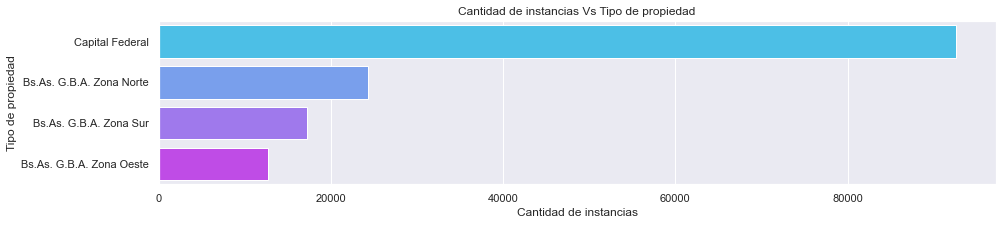

In [19]:
# Visualización (horizontal) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
plt.figure(figsize=(15,3))
sns.countplot(data = df, y = 'l2', order = df['l2'].value_counts().index, palette='cool')
plt.title('Cantidad de instancias Vs Tipo de propiedad')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Tipo de propiedad')

In [20]:
# Categorias para la variable l3: 89 (Barrios)
df.l3.value_counts(dropna=False).reset_index().sort_values('index').reset_index(drop=True)

,index,l3
0,Abasto,462
1,Agronomía,165
2,Almagro,7527
3,Almirante Brown,1228
4,Avellaneda,1370
...,...,...
84,Villa Riachuelo,42
85,Villa Santa Rita,354
86,Villa Soldati,69
87,Villa Urquiza,3339


Text(0, 0.5, 'Tipo de propiedad')

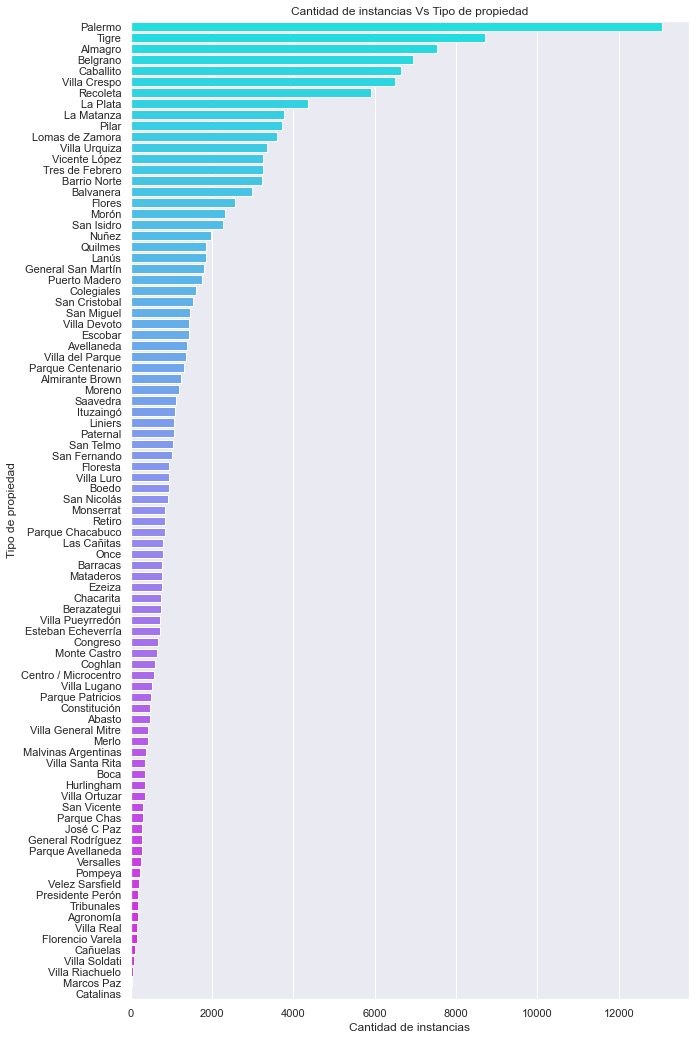

In [21]:
# Visualización (horizontal) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
plt.figure(figsize=(10,18))
sns.countplot(data = df, y = 'l3', order = df['l3'].value_counts().index, palette='cool')
plt.title('Cantidad de instancias Vs Tipo de propiedad')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Tipo de propiedad')

In [22]:
# Categorias para la variable property_type: 10 (Tipos de propiedad)
df.property_type.value_counts(dropna=False).reset_index().sort_values('index').reset_index(drop=True)

,index,property_type
0,Casa,21521
1,Casa de campo,322
2,Cochera,259
3,Departamento,107326
4,Depósito,265
5,Local comercial,325
6,Lote,1312
7,Oficina,658
8,Otro,374
9,PH,14298


Text(0, 0.5, 'Tipo de propiedad')

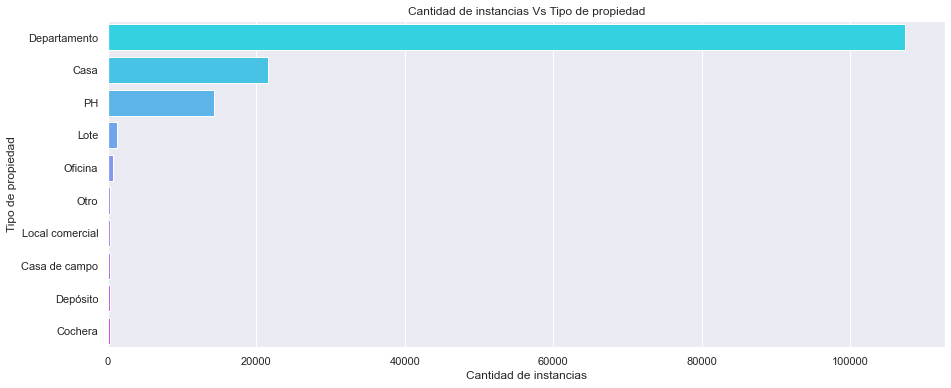

In [23]:
# Visualización (horizontal) empleando la gráfica de conteo (countplot) de seaborn de Cantidad de instancias Vs Tipo de propiedad
plt.figure(figsize=(15,6))
sns.countplot(data = df, y = 'property_type', order = df['property_type'].value_counts().index, palette='cool')
plt.title('Cantidad de instancias Vs Tipo de propiedad')
plt.xlabel('Cantidad de instancias')
plt.ylabel('Tipo de propiedad')

##### 2.2. Variables numéricas discretas:
Los atributos que presentan el mismo valor para todos sus registos evidentemente no son utiles para el modelo porque no generan ninguna distinción.

In [24]:
# Generamos un listado con todas las variables categoricas del dataset
# (Nota: el las lineas que continuan se demuestra la cantidad de categorias para cada variable categórica) 
col_num_dis = ['rooms', 'bedrooms', 'bathrooms']

In [25]:
df[col_num_dis]

,rooms,bedrooms,bathrooms
0,7.0,7.0,2.0
1,2.0,1.0,2.0
2,2.0,1.0,1.0
3,2.0,1.0,1.0
4,2.0,1.0,1.0
...,...,...,...
146655,2.0,1.0,1.0
146656,4.0,3.0,2.0
146657,1.0,1.0,1.0
146658,2.0,1.0,1.0


In [26]:
df[col_num_dis].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   rooms      146660 non-null  float64
 1   bedrooms   146660 non-null  float64
 2   bathrooms  140703 non-null  float64
dtypes: float64(3)
memory usage: 3.4 MB


##### 2.3. Variables numéricas continuas:
Los atributos que presentan el mismo valor para todos sus registos evidentemente no son utiles para el modelo porque no generan ninguna distinción.

In [27]:
# Generamos un listado con todas las variables numéricas continuas del dataset
# (Aunque el precio tambien es una variable numérica continua la dejareremos aparte por considerarse el target)
col_num_con = ['lat', 'lon','surface_total', 'surface_covered']
col_num_con_target = ['price']

In [28]:
df[col_num_con]

,lat,lon,surface_total,surface_covered
0,-34.605880,-58.384949,140.0,140.0
1,-34.624056,-58.412110,70.0,58.0
2,-34.593569,-58.427474,45.0,45.0
3,-34.581294,-58.436754,85.0,50.0
4,-34.914194,-57.938219,50.0,35.0
...,...,...,...,...
146655,-34.816348,-58.181963,54.0,48.0
146656,-34.446459,-58.937810,164.0,90.0
146657,-34.444633,-58.981606,50.0,35.0
146658,-34.444830,-58.981796,38.0,38.0


In [29]:
df[col_num_con].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              136735 non-null  float64
 1   lon              136701 non-null  float64
 2   surface_total    126133 non-null  float64
 3   surface_covered  125046 non-null  float64
dtypes: float64(4)
memory usage: 4.5 MB


##### 2.4. Variables numéricas (totalidad):
Los atributos que presentan el mismo valor para todos sus registos evidentemente no son utiles para el modelo porque no generan ninguna distinción.

In [30]:
# Generamos un listado con todas las variables numéricas continuas del dataset
# (Aunque el precio tambien es una variable numérica continua la dejareremos aparte por considerarse el target)
col_num = col_num_dis + col_num_con + col_num_con_target
col_num

['rooms',
 'bedrooms',
 'bathrooms',
 'lat',
 'lon',
 'surface_total',
 'surface_covered',
 'price']

In [31]:
df[col_num]

,rooms,bedrooms,bathrooms,lat,lon,surface_total,surface_covered,price
0,7.0,7.0,2.0,-34.605880,-58.384949,140.0,140.0,153000.0
1,2.0,1.0,2.0,-34.624056,-58.412110,70.0,58.0,159000.0
2,2.0,1.0,1.0,-34.593569,-58.427474,45.0,45.0,125000.0
3,2.0,1.0,1.0,-34.581294,-58.436754,85.0,50.0,295000.0
4,2.0,1.0,1.0,-34.914194,-57.938219,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...
146655,2.0,1.0,1.0,-34.816348,-58.181963,54.0,48.0,165000.0
146656,4.0,3.0,2.0,-34.446459,-58.937810,164.0,90.0,130000.0
146657,1.0,1.0,1.0,-34.444633,-58.981606,50.0,35.0,73000.0
146658,2.0,1.0,1.0,-34.444830,-58.981796,38.0,38.0,68000.0


# Parte A. Trasformación de datos

## A. 01. Detección y eliminación de Outliers

El procesamiento de eliminación de outliers se hace especificamante sobre las variables de tipo numérico.

In [65]:
df

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,-34.914194,-57.938219,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,Departamento
146656,-34.446459,-58.937810,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,Departamento
146657,-34.444633,-58.981606,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,Departamento
146658,-34.444830,-58.981796,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,Departamento


In [68]:
# Definimos las columnas para las cuales haremos eliminacion de outliers
col_outliers=col_num
col_outliers

['rooms',
 'bedrooms',
 'bathrooms',
 'lat',
 'lon',
 'surface_total',
 'surface_covered',
 'price']

In [33]:
# Visualizamos el dataframe que nos permitira identificar los outliers
df[col_outliers]

,rooms,bedrooms,bathrooms,lat,lon,surface_total,surface_covered,price
0,7.0,7.0,2.0,-34.605880,-58.384949,140.0,140.0,153000.0
1,2.0,1.0,2.0,-34.624056,-58.412110,70.0,58.0,159000.0
2,2.0,1.0,1.0,-34.593569,-58.427474,45.0,45.0,125000.0
3,2.0,1.0,1.0,-34.581294,-58.436754,85.0,50.0,295000.0
4,2.0,1.0,1.0,-34.914194,-57.938219,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...
146655,2.0,1.0,1.0,-34.816348,-58.181963,54.0,48.0,165000.0
146656,4.0,3.0,2.0,-34.446459,-58.937810,164.0,90.0,130000.0
146657,1.0,1.0,1.0,-34.444633,-58.981606,50.0,35.0,73000.0
146658,2.0,1.0,1.0,-34.444830,-58.981796,38.0,38.0,68000.0


In [34]:
# Definimos una función que retorna los indices de los registros que se consideran outlier
# (Bajo el criterio basado en el rango intercuartilico)
# Entrada: la serie de la que deseamos encontrar outlayers
# Salida: Los indices que de los outliers en la serie
def indx_outlier_rang_int(series):
    q75=series.quantile(0.75)
    q25=series.quantile(0.25)
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    mascara_outliers = (series < minimo) | (series > maximo)
    return list(series[mascara_outliers].index)

In [72]:
 #indx_outlier_rang_int(df.rooms)

In [35]:
# Definimos una función que retorna los indices de los registros que se consideran outliers
# (Bajo el criterio de las tres sigmas)
# Entrada: la serie de la que deseamos encontrar outliers
# Salida: Los indices que de los outliers en la serie
def indx_outlier_3_sig(series):
    valor_medio = series.mean()
    std = series.std()
    minimo = valor_medio - 3*std
    maximo = valor_medio + 3*std
    mascara_outliers = (series < minimo) | (series > maximo)
    return list(series[mascara_outliers].index)

In [36]:
# Definimos una función que retorna los indices de los registros que se consideran outliers
# (Empleando simultaneamento los criterios de rango intercuartilico y de los 3 sigmas)
# Entrada: la serie de la que deseamos encontrar outliers
# Salida: Los indices que de los outliers en la serie
def indx_outlier_mix(series):
    return sorted(list(set(indx_outlier_rang_int(series)+indx_outlier_3_sig(series))))

In [37]:
# Definimos una función que nos entrega la totalidad de los indices de outliers teniendo en cuenta varias columnas
# Entradas: dataframe del que deseamos encontrar los outliers
# Salidas: columnas del dataframe de las que nos interesa que haga el analisis de outliers
def indx_outlier_mix_df(df,col_outliers):
    indx_total=[]
    for col in col_outliers:
        indx = indx_outlier_mix(df[col])
        indx_total=indx_total+indx
    return sorted(list(set(indx_total)))

In [69]:
# Calculamos la totalidad de los indices que consideramos outliers acorde a nuestra función
indx_outlier_total = indx_outlier_mix_df(df,col_outliers)

In [39]:
# Calculamos el porcentaje de valores del dataframe que se consideran outliers
round(100*len(indx_outlier_total)/len(df),2)

32.2

In [40]:
# Finalmente obtendriamos el dataframe filtrado para sin los valores que consideramos outliers
df_no_outliers= df.drop(indx_outlier_total)
df_no_outliers

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,340000.0,Departamento
146602,-34.698124,-58.288038,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,320000.0,Departamento
146652,-34.582228,-58.540320,Bs.As. G.B.A. Zona Norte,General San Martín,2.0,1.0,1.0,38.0,38.0,70000.0,Departamento
146653,-34.613848,-58.542955,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,45.0,45.0,110000.0,PH


Text(0.5, 1.0, 'Distribución de la variable surface_total')

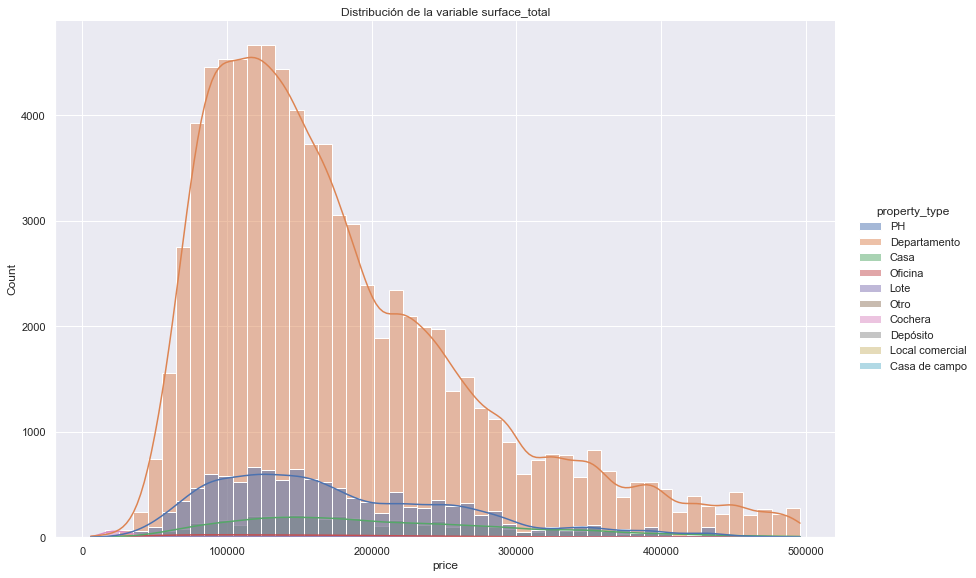

In [41]:
# Nueva distribución que toma la variable surface_total tras el filtrado (Histograma)
sns.displot(data = df_no_outliers, x='price', hue='property_type' , bins = 50, kde=True, height=8, aspect=1.5)
plt.title('Distribución de la variable surface_total')

## A. 02. Encoding

##### Econding: empleando get_dummies de Pandas

In [42]:
df_no_outliers

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,340000.0,Departamento
146602,-34.698124,-58.288038,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,320000.0,Departamento
146652,-34.582228,-58.540320,Bs.As. G.B.A. Zona Norte,General San Martín,2.0,1.0,1.0,38.0,38.0,70000.0,Departamento
146653,-34.613848,-58.542955,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,45.0,45.0,110000.0,PH


In [43]:
col_encoding = col_cat
col_encoding

['l2', 'l3', 'property_type']

In [44]:
df_encode_pandas = pd.get_dummies(df_no_outliers, columns=col_encoding, drop_first=True)
df_encode_pandas

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,l3_Agronomía,l3_Almagro,l3_Almirante Brown,l3_Avellaneda,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Berazategui,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Cañuelas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Escobar,l3_Esteban Echeverría,l3_Ezeiza,l3_Florencio Varela,l3_Flores,l3_Floresta,l3_General Rodríguez,l3_General San Martín,l3_Hurlingham,l3_Ituzaingó,l3_José C Paz,l3_La Matanza,l3_La Plata,l3_Lanús,l3_Las Cañitas,l3_Liniers,l3_Lomas de Zamora,l3_Malvinas Argentinas,l3_Marcos Paz,l3_Mataderos,l3_Merlo,l3_Monserrat,l3_Monte Castro,l3_Moreno,l3_Morón,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pilar,l3_Pompeya,l3_Presidente Perón,l3_Puerto Madero,l3_Quilmes,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Fernando,l3_San Isidro,l3_San Miguel,l3_San Nicolás,l3_San Telmo,l3_San Vicente,l3_Tigre,l3_Tres de Febrero,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Vicente López,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,3.0,2.0,2.0,107.0,88.0,340000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146602,-34.698124,-58.288038,3.0,2.0,2.0,107.0,88.0,320000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146652,-34.582228,-58.540320,2.0,1.0,1.0,38.0,38.0,70000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

##### Econding: empleando OneHotEncoder de sklearn

In [45]:
df_no_outliers

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,-34.600988,-58.433061,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,340000.0,Departamento
146602,-34.698124,-58.288038,Bs.As. G.B.A. Zona Sur,Quilmes,3.0,2.0,2.0,107.0,88.0,320000.0,Departamento
146652,-34.582228,-58.540320,Bs.As. G.B.A. Zona Norte,General San Martín,2.0,1.0,1.0,38.0,38.0,70000.0,Departamento
146653,-34.613848,-58.542955,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,45.0,45.0,110000.0,PH


In [46]:
df_no_outliers[col_cat]

,l2,l3,property_type
1,Capital Federal,Boedo,PH
2,Capital Federal,Palermo,PH
3,Capital Federal,Palermo,PH
5,Capital Federal,Villa Crespo,PH
6,Capital Federal,Villa Crespo,PH
...,...,...,...
146601,Bs.As. G.B.A. Zona Sur,Quilmes,Departamento
146602,Bs.As. G.B.A. Zona Sur,Quilmes,Departamento
146652,Bs.As. G.B.A. Zona Norte,General San Martín,Departamento
146653,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,PH


In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
one = OneHotEncoder(drop='first')

In [49]:
my_array=one.fit_transform(df_no_outliers[col_cat]).toarray()
my_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [50]:
my_array.shape

(99433, 100)

In [51]:
one.get_feature_names()

array(['x0_Bs.As. G.B.A. Zona Oeste', 'x0_Bs.As. G.B.A. Zona Sur',
       'x0_Capital Federal', 'x1_Agronomía', 'x1_Almagro',
       'x1_Almirante Brown', 'x1_Avellaneda', 'x1_Balvanera',
       'x1_Barracas', 'x1_Barrio Norte', 'x1_Belgrano', 'x1_Berazategui',
       'x1_Boca', 'x1_Boedo', 'x1_Caballito', 'x1_Catalinas',
       'x1_Cañuelas', 'x1_Centro / Microcentro', 'x1_Chacarita',
       'x1_Coghlan', 'x1_Colegiales', 'x1_Congreso', 'x1_Constitución',
       'x1_Escobar', 'x1_Esteban Echeverría', 'x1_Ezeiza',
       'x1_Florencio Varela', 'x1_Flores', 'x1_Floresta',
       'x1_General Rodríguez', 'x1_General San Martín', 'x1_Hurlingham',
       'x1_Ituzaingó', 'x1_José C Paz', 'x1_La Matanza', 'x1_La Plata',
       'x1_Lanús', 'x1_Las Cañitas', 'x1_Liniers', 'x1_Lomas de Zamora',
       'x1_Malvinas Argentinas', 'x1_Marcos Paz', 'x1_Mataderos',
       'x1_Merlo', 'x1_Monserrat', 'x1_Monte Castro', 'x1_Moreno',
       'x1_Morón', 'x1_Nuñez', 'x1_Once', 'x1_Palermo',
       'x1_Parq

In [52]:
df_encode_base = pd.DataFrame(data=my_array,columns=one.get_feature_names(), index=df_no_outliers.index)
df_encode_base

,x0_Bs.As. G.B.A. Zona Oeste,x0_Bs.As. G.B.A. Zona Sur,x0_Capital Federal,x1_Agronomía,x1_Almagro,x1_Almirante Brown,x1_Avellaneda,x1_Balvanera,x1_Barracas,x1_Barrio Norte,x1_Belgrano,x1_Berazategui,x1_Boca,x1_Boedo,x1_Caballito,x1_Catalinas,x1_Cañuelas,x1_Centro / Microcentro,x1_Chacarita,x1_Coghlan,x1_Colegiales,x1_Congreso,x1_Constitución,x1_Escobar,x1_Esteban Echeverría,x1_Ezeiza,x1_Florencio Varela,x1_Flores,x1_Floresta,x1_General Rodríguez,x1_General San Martín,x1_Hurlingham,x1_Ituzaingó,x1_José C Paz,x1_La Matanza,x1_La Plata,x1_Lanús,x1_Las Cañitas,x1_Liniers,x1_Lomas de Zamora,x1_Malvinas Argentinas,x1_Marcos Paz,x1_Mataderos,x1_Merlo,x1_Monserrat,x1_Monte Castro,x1_Moreno,x1_Morón,x1_Nuñez,x1_Once,x1_Palermo,x1_Parque Avellaneda,x1_Parque Centenario,x1_Parque Chacabuco,x1_Parque Chas,x1_Parque Patricios,x1_Paternal,x1_Pilar,x1_Pompeya,x1_Presidente Perón,x1_Puerto Madero,x1_Quilmes,x1_Recoleta,x1_Retiro,x1_Saavedra,x1_San Cristobal,x1_San Fernando,x1_San Isidro,x1_San Miguel,x1_San Nicolás,x1_San Telmo,x1_San Vicente,x1_Tigre,x1_Tres de Febrero,x1_Tribunales,x1_Velez Sarsfield,x1_Versalles,x1_Vicente López,x1_Villa Crespo,x1_Villa Devoto,x1_Villa General Mitre,x1_Villa Lugano,x1_Villa Luro,x1_Villa Ortuzar,x1_Villa Pueyrredón,x1_Villa Real,x1_Villa Riachuelo,x1_Villa Santa Rita,x1_Villa Soldati,x1_Villa Urquiza,x1_Villa del Parque,x2_Casa de campo,x2_Cochera,x2_Departamento,x2_Depósito,x2_Local comercial,x2_Lote,x2_Oficina,x2_Otro,x2_PH
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [53]:
df_encode_sklearn = df_no_outliers.drop(col_cat,axis=1).join(df_encode_base)
df_encode_sklearn

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,x0_Bs.As. G.B.A. Zona Oeste,x0_Bs.As. G.B.A. Zona Sur,x0_Capital Federal,x1_Agronomía,x1_Almagro,x1_Almirante Brown,x1_Avellaneda,x1_Balvanera,x1_Barracas,x1_Barrio Norte,x1_Belgrano,x1_Berazategui,x1_Boca,x1_Boedo,x1_Caballito,x1_Catalinas,x1_Cañuelas,x1_Centro / Microcentro,x1_Chacarita,x1_Coghlan,x1_Colegiales,x1_Congreso,x1_Constitución,x1_Escobar,x1_Esteban Echeverría,x1_Ezeiza,x1_Florencio Varela,x1_Flores,x1_Floresta,x1_General Rodríguez,x1_General San Martín,x1_Hurlingham,x1_Ituzaingó,x1_José C Paz,x1_La Matanza,x1_La Plata,x1_Lanús,x1_Las Cañitas,x1_Liniers,x1_Lomas de Zamora,x1_Malvinas Argentinas,x1_Marcos Paz,x1_Mataderos,x1_Merlo,x1_Monserrat,x1_Monte Castro,x1_Moreno,x1_Morón,x1_Nuñez,x1_Once,x1_Palermo,x1_Parque Avellaneda,x1_Parque Centenario,x1_Parque Chacabuco,x1_Parque Chas,x1_Parque Patricios,x1_Paternal,x1_Pilar,x1_Pompeya,x1_Presidente Perón,x1_Puerto Madero,x1_Quilmes,x1_Recoleta,x1_Retiro,x1_Saavedra,x1_San Cristobal,x1_San Fernando,x1_San Isidro,x1_San Miguel,x1_San Nicolás,x1_San Telmo,x1_San Vicente,x1_Tigre,x1_Tres de Febrero,x1_Tribunales,x1_Velez Sarsfield,x1_Versalles,x1_Vicente López,x1_Villa Crespo,x1_Villa Devoto,x1_Villa General Mitre,x1_Villa Lugano,x1_Villa Luro,x1_Villa Ortuzar,x1_Villa Pueyrredón,x1_Villa Real,x1_Villa Riachuelo,x1_Villa Santa Rita,x1_Villa Soldati,x1_Villa Urquiza,x1_Villa del Parque,x2_Casa de campo,x2_Cochera,x2_Departamento,x2_Depósito,x2_Local comercial,x2_Lote,x2_Oficina,x2_Otro,x2_PH
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## A. 03. Imputación de valores faltantes

In [54]:
# Visualicemos las columnas para las cuales se presetan valores nulos
# (Lo hacemos respecto al la matriz sin el encodig porque vemso que los
# valores nulos unicamante se encuentran en las variables numéricas y así es mas fácil visualizarlo)
df_no_outliers.isnull().sum()

lat                 7784
lon                 7816
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           3343
surface_total      12331
surface_covered    12743
price                  0
property_type          0
dtype: int64

##### A.03.01 Registros que no se imputaran (se eliminaran si son nulos)

Dado que la variable de superfice es una de las que mayor sensibilidad respecto al precio, si no conocemos la superficie total ni la superficie cubierta no tendremos en cuanta estos registros (los eliminaremos) pues es poco fiable imputarlos a partir de otros parametros:

In [55]:
# Encontremos los indices de los registros que presentan valores nulos en los registros de superficie
indx_to_drop = df_encode_pandas[(df_encode_pandas.surface_covered.isnull()==True)&(df_encode_pandas.surface_total.isnull()==True)].index

In [56]:
# Calculamos de manera informativa el porcentaje de datos que representan respecto al dataset original
round(100*(len(df)-len(df.drop(indx_to_drop)))/len(df),2)

8.2

In [57]:
df_imputed = df_encode_pandas.drop(indx_to_drop)
df_imputed

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal,l3_Agronomía,l3_Almagro,l3_Almirante Brown,l3_Avellaneda,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Berazategui,l3_Boca,l3_Boedo,l3_Caballito,l3_Catalinas,l3_Cañuelas,l3_Centro / Microcentro,l3_Chacarita,l3_Coghlan,l3_Colegiales,l3_Congreso,l3_Constitución,l3_Escobar,l3_Esteban Echeverría,l3_Ezeiza,l3_Florencio Varela,l3_Flores,l3_Floresta,l3_General Rodríguez,l3_General San Martín,l3_Hurlingham,l3_Ituzaingó,l3_José C Paz,l3_La Matanza,l3_La Plata,l3_Lanús,l3_Las Cañitas,l3_Liniers,l3_Lomas de Zamora,l3_Malvinas Argentinas,l3_Marcos Paz,l3_Mataderos,l3_Merlo,l3_Monserrat,l3_Monte Castro,l3_Moreno,l3_Morón,l3_Nuñez,l3_Once,l3_Palermo,l3_Parque Avellaneda,l3_Parque Centenario,l3_Parque Chacabuco,l3_Parque Chas,l3_Parque Patricios,l3_Paternal,l3_Pilar,l3_Pompeya,l3_Presidente Perón,l3_Puerto Madero,l3_Quilmes,l3_Recoleta,l3_Retiro,l3_Saavedra,l3_San Cristobal,l3_San Fernando,l3_San Isidro,l3_San Miguel,l3_San Nicolás,l3_San Telmo,l3_San Vicente,l3_Tigre,l3_Tres de Febrero,l3_Tribunales,l3_Velez Sarsfield,l3_Versalles,l3_Vicente López,l3_Villa Crespo,l3_Villa Devoto,l3_Villa General Mitre,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,property_type_Lote,property_type_Oficina,property_type_Otro,property_type_PH
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146601,-34.699289,-58.288059,3.0,2.0,2.0,107.0,88.0,340000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146602,-34.698124,-58.288038,3.0,2.0,2.0,107.0,88.0,320000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
146652,-34.582228,-58.540320,2.0,1.0,1.0,38.0,38.0,70000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

##### A.03.02 Imputación de los valores de surface_covered y surface_total entre sí

Dado que la variable de superfice es una de las que mayor sensibilidad respecto al precio, si no conocemos la superficie total ni la superficie cubierta no tendremos en cuanta estos registros (los eliminaremos) pues es poco fiable imputarlos a partir de otros parametros:

In [58]:
df_imputed[['surface_total','surface_covered']].isna().sum()

surface_total      298
surface_covered    710
dtype: int64

In [59]:
df_pre_imp_sup = df_imputed[['surface_total','surface_covered']]
df_pre_imp_sup

,surface_total,surface_covered
1,70.0,58.0
2,45.0,45.0
3,85.0,50.0
5,56.0,56.0
6,70.0,70.0
...,...,...
146601,107.0,88.0
146602,107.0,88.0
146652,38.0,38.0
146653,45.0,45.0


In [60]:
df_pre_imp_sup[df_pre_imp_sup.surface_covered.isnull()==True]

,surface_total,surface_covered
722,35.0,NaN
976,60.0,NaN
1966,200.0,NaN
3153,251.0,NaN
3154,173.0,NaN
...,...,...
145578,147.0,NaN
145589,153.0,NaN
145590,73.0,NaN
145595,92.0,NaN


In [61]:
from sklearn.impute import KNNImputer

In [62]:
imp_sup = KNNImputer(n_neighbors=10, weights="distance")º

SyntaxError: invalid syntax (<ipython-input-62-825adc58c35f>, line 1)

In [ ]:
array_pos_imp_sup = imp_sup.fit_transform(df_pre_imp_sup)
array_pos_imp_sup

In [ ]:
array_pos_imp_sup.shape

In [ ]:
df_pos_imp_sup = pd.DataFrame(data=array_pos_imp_sup,columns=df_pre_imp_sup.columns, index=df_pre_imp_sup.index)
df_pos_imp_sup

In [ ]:
df_imputed[['surface_total','surface_covered']]=df_pos_imp_sup
df_imputed

In [ ]:
df_imputed[['surface_total','surface_covered']].isna().sum()

In [ ]:
df_imputed[df_pre_imp_sup.surface_covered.isnull()==True]

## A. 04. Escalado de los datos

In [ ]:
df_imputed

In [ ]:
col_scaler = col_num_dis+ col_num_con
col_scaler

In [ ]:
df_imputed[col_scaler]

In [ ]:
# Función que me permite escalar empleando el StandarScaler
# Entradas: df (dataframe que quiero escalar, col (lista con las columnas que deseo escalar))
# Salida: dataframe escalado en las columnas que se pidio (mantiene indices de filas y columnas)
def get_scaler_standar(df,columns):
    df_scaled=df.copy()
    std_scaler = StandardScaler()
    array_scaled=std_scaler.fit_transform(df[columns])
    df_scaled_columns = pd.DataFrame(data=array_scaled, columns=df[columns].columns, index=df[columns].index)
    df_scaled[columns]=df_scaled_columns
    return df_scaled

In [ ]:
get_scaler_standar(df_imputed,columns=col_scaler)

In [ ]:
df_imputed

In [ ]:
# Función que me permite escalar logaritmicamente
# Entradas: df (dataframe que quiero escalar, col (lista con las columnas que deseo escalar))
# Salida: dataframe escalado en las columnas que se pidio (mantiene indices de filas y columnas)
def get_scaler_logaritmic(df,columns):
    df_scaled=df.copy()
    df_scaled[columns]=df_scaled[columns].applymap(lambda x: np.log(x+1))
    return df_scaled

In [ ]:
get_scaler_logaritmic(df_imputed,columns=['surface_total'])

In [ ]:
df_imputed

## A. 05. Generación de nuevas variables predictoras / Reducción de la dimensionalidad (SVD/PCA)